In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('survey.csv')

# Information about the data

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Age distribution

In [5]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_process)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5172\1858026343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')


Text(0, 0.5, 'Freq')

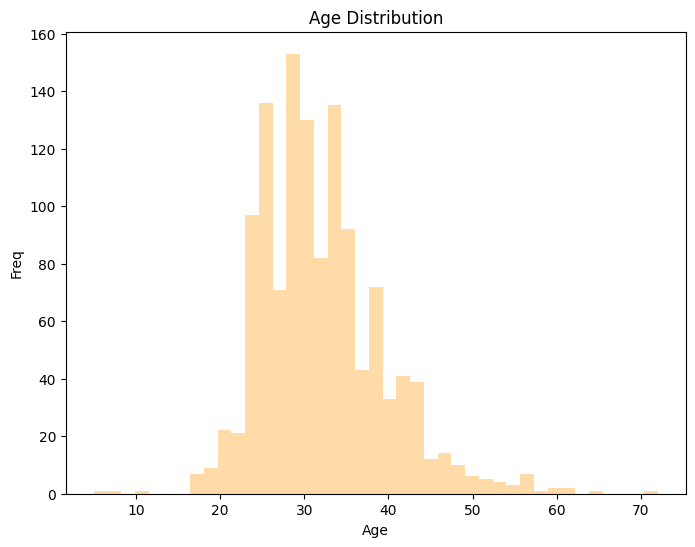

In [6]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')
plt.title('Age Distribution')
plt.ylabel('Freq')

# Top 10 countries (having most number of people in a bad mental health)

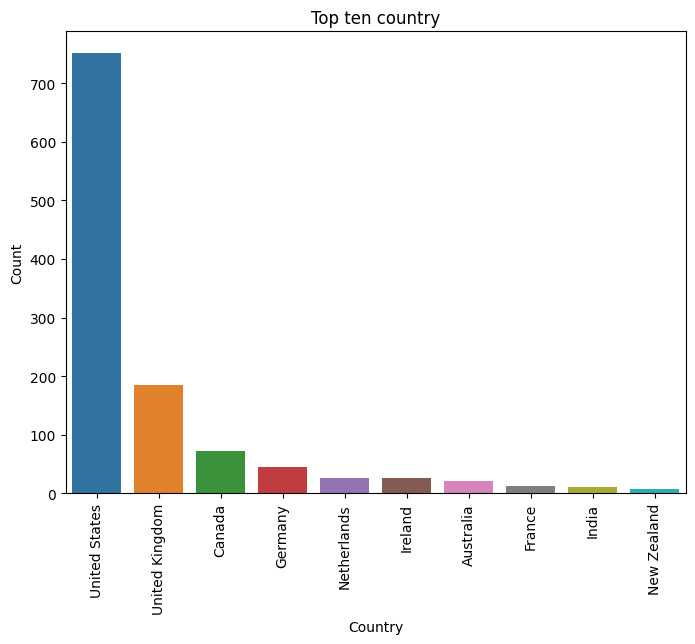

In [7]:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['Year'] = df['Timestamp'].apply(lambda x:x.year)


# Employee group ratio

Text(0.5, 0, 'employee group')

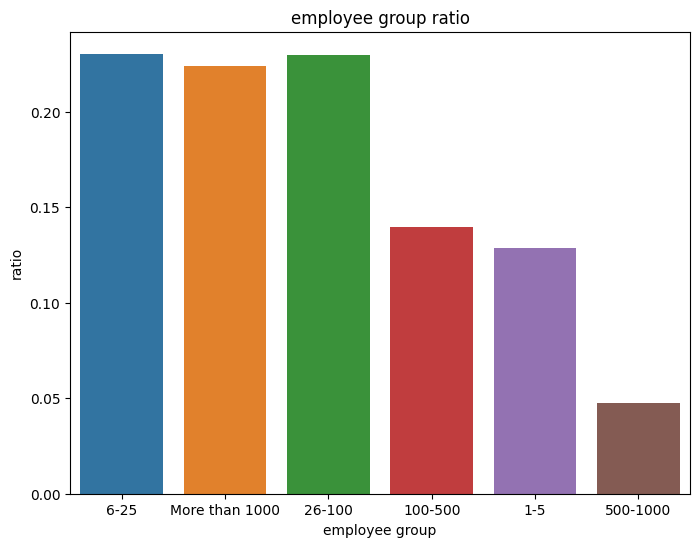

In [9]:
fig,ax = plt.subplots(figsize=(8,6))
total = df['no_employees'].dropna().shape[0] * 1.0
employee_count  = Counter(df['no_employees'].dropna().tolist())
for key,val in employee_count.items():
    employee_count[key] = employee_count[key] / total
employee_group = np.asarray(list(employee_count.keys()))
employee_val = np.asarray(list(employee_count.values()))
sns.barplot(x = employee_group , y = employee_val)
plt.title('employee group ratio')
plt.ylabel('ratio')
plt.xlabel('employee group')

# Treatment Distribution

In [11]:
#sns.countplot(df['treatment'])

#plt.title('Treatement Distribution')

# Work interfere distribution

In [13]:
#fig,ax  =plt.subplots(figsize=(8,6))
#sns.countplot(df['work_interfere'].dropna(),ax=ax)
#plt.title('Work interfere Distribution')
#plt.ylabel('Count')